###KNN - K vecinos más cercanos

Método de clasificación supervisada que estima la probabilidad de que un elemento 'X' pertenezca a una clase 'C' a partir de la información proporcionada.

En el reconocimiento de patrones, este algoritmo es usado como método de clasificación de objetos, basado en un entrenamiento mediante ejemplos cercanos en el espacio de los elementos. 

Trabaja con cualquier número de clases.

Funciona de la siguiente manera: 
1) Calcula la fistancia del circulo 'verde' a tosos los demas elementos.
2) Ordena los puntos en función de la distancia que los separa del verde, de menor a mayor.
3) Predice el grupo al que pertenece e circulo 'verde' en función de la clase a la que pertenecen los 'k' elementos más cercanos.

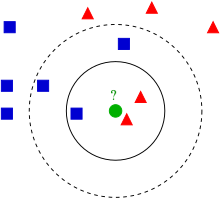

Si k = 3, el curculo es de la clase Triangulo Rojo. Si k = 5, el circulo es de la clase Cuadrado Rojo

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


Paso 1 OBTENCIÓN DE DATOS

In [4]:
path="/content/drive/MyDrive/Colab Notebooks/Bimestre 3/vehicle_silhouette_dataset.csv"

In [5]:
df = pd.read_csv(path)
df

,compactness,circularity,distance_circularity,radius_ratio,pr_axis_aspect_ratio,max_length_aspect_ratio,scatter_ratio,elongatedness,pr_axis_rectangularity,max_length_rectangularity,scaled_variance_major_axis,scaled_variance_minor_axis,scaled_radius_gyration,skewness_major_axis,skewness_minor_axis,kurtosis_minor_axis,kurtosis_major_axis,hollows_ratio,vehicle_class
0,95.0,48.0,83.0,178.0,72.0,10.0,162.0,42.0,20.0,159.0,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197.0,van
1,91.0,41.0,84.0,141.0,57.0,9.0,149.0,45.0,19.0,143.0,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199.0,van
2,104.0,50.0,106.0,209.0,66.0,10.0,207.0,32.0,23.0,158.0,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196.0,saab
3,93.0,41.0,82.0,159.0,63.0,9.0,144.0,46.0,19.0,143.0,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207.0,van
4,85.0,44.0,70.0,205.0,103.0,52.0,149.0,45.0,19.0,144.0,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183.0,bus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,93.0,39.0,87.0,183.0,64.0,8.0,169.0,40.0,20.0,134.0,200.0,422.0,149.0,72.0,7.0,25.0,188.0,195.0,saab
842,89.0,46.0,84.0,163.0,66.0,11.0,159.0,43.0,20.0,159.0,173.0,368.0,176.0,72.0,1.0,20.0,186.0,197.0,van
843,106.0,54.0,101.0,222.0,67.0,12.0,222.0,30.0,25.0,173.0,228.0,721.0,200.0,70.0,3.0,4.0,187.0,201.0,saab
844,86.0,36.0,78.0,146.0,58.0,7.0,135.0,50.0,18.0,124.0,155.0,270.0,148.0,66.0,0.0,25.0,190.0,195.0,saab


In [6]:
df['vehicle_class'].unique()

array(['van', 'saab', 'bus', 'opel'], dtype=object)

Aqui vemos los tipos de vehiculo posibles, para predecir.

Paso 2 LIMPIEZA DE DATOS. En este caso lo dejamos tal cual estaban.

Paso 3 SEPARACIÓN DATOS DE ENTRENAMIENTO Y DE PRUEBA

In [7]:
y = df['vehicle_class']
x = df.drop('vehicle_class', axis = 1)

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 45)

Paso 4 ENTRENAMIENTO DEL MODELO

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
knn = KNeighborsClassifier(n_neighbors=1)
#el numero de vecinos aca fue aleatorio

In [13]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

Paso 5 EVALUACION DEL MODELO

In [14]:
predicciones = knn.predict(x_test)

In [15]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, predicciones))

[[65  0  7  5]
 [ 7 24 28  6]
 [ 5 26 23  3]
 [ 2  0  2 51]]


In [16]:
print(classification_report(y_test, predicciones))

              precision    recall  f1-score   support

         bus       0.82      0.84      0.83        77
        opel       0.48      0.37      0.42        65
        saab       0.38      0.40      0.39        57
         van       0.78      0.93      0.85        55

    accuracy                           0.64       254
   macro avg       0.62      0.64      0.62       254
weighted avg       0.63      0.64      0.63       254



Evaluamos que k seria el optimo para tener una presicion mayor

In [17]:
tasa_error = []
for i in range(1,30):
  knn = KNeighborsClassifier(n_neighbors = i)
  knn.fit(x_train, y_train)
  predicion_i = knn.predict(x_test)
  tasa_error.append(np.mean(predicion_i != y_test))

In [18]:
tasa_error

[0.35826771653543305,
 0.3464566929133858,
 0.3188976377952756,
 0.3228346456692913,
 0.33858267716535434,
 0.3346456692913386,
 0.3228346456692913,
 0.33858267716535434,
 0.36220472440944884,
 0.3661417322834646,
 0.35039370078740156,
 0.3661417322834646,
 0.36220472440944884,
 0.38188976377952755,
 0.35039370078740156,
 0.3661417322834646,
 0.3661417322834646,
 0.3700787401574803,
 0.3661417322834646,
 0.3779527559055118,
 0.3661417322834646,
 0.37401574803149606,
 0.37401574803149606,
 0.37401574803149606,
 0.3779527559055118,
 0.38976377952755903,
 0.38188976377952755,
 0.3700787401574803,
 0.37401574803149606]

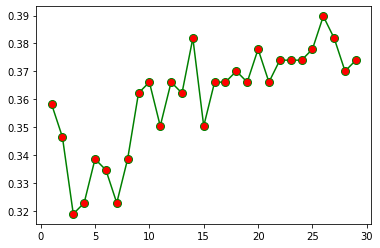

In [19]:
valores = range(1, 30)
plt.plot(valores, tasa_error, color = 'green', marker = 'o', markerfacecolor = 'red', markersize = 8)

El de menor tasa de error es el k = 3

Paso 4 ENTRENAMIENTO DEL MODELO

In [20]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)
predicciones = knn.predict(x_test)

Paso 5 EVALUACION DEL MODELO

In [21]:
print(classification_report(y_test, predicciones))

              precision    recall  f1-score   support

         bus       0.77      0.88      0.82        77
        opel       0.58      0.45      0.50        65
        saab       0.44      0.39      0.41        57
         van       0.82      0.98      0.89        55

    accuracy                           0.68       254
   macro avg       0.65      0.67      0.66       254
weighted avg       0.66      0.68      0.66       254

